In [1]:
%matplotlib notebook

import os
import glob
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as pl
import astropy
import astropy.io.fits

from IPython.display import display


In [2]:
target = "KELT-11"

folder_path = f"/Users/Fribeiro/Desktop/PT_Data/{target}"
# f"/Users/Fribeiro/Desktop/PT_data/KELT-11"
#folder_path=f"/Users/Fribeiro/Desktop/PT_data/{target}"

path2files = {}

               
for filetype in ["FullArray", "Imagette", "SubArray"]:
    res = glob.glob(os.path.join(folder_path, f"*{filetype}*"))
    if len(res) == 0:
        raise ValueError(f"File {filetype} not found !")
    else:
        path2files[filetype] = res[0]
        
print(path2files)

{'FullArray': '/Users/Fribeiro/Desktop/PT_Data/KELT-11/CH_PR300024_TG000101_TU2020-03-09T14-49-43_SCI_RAW_FullArray_V0101.fits', 'Imagette': '/Users/Fribeiro/Desktop/PT_Data/KELT-11/CH_PR300024_TG000101_TU2020-03-09T14-50-33_SCI_RAW_Imagette_V0101.fits', 'SubArray': '/Users/Fribeiro/Desktop/PT_Data/KELT-11/CH_PR300024_TG000101_TU2020-03-09T14-50-41_SCI_RAW_SubArray_V0101.fits'}


In [3]:
with astropy.io.fits.open(path2files["FullArray"]) as hdul:
    print(hdul.info())

Filename: /Users/Fribeiro/Desktop/PT_Data/KELT-11/CH_PR300024_TG000101_TU2020-03-09T14-49-43_SCI_RAW_FullArray_V0101.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SCI_RAW_FullArray    1 ImageHDU        90   (1024, 1024)   int16 (rescales to uint16)   
  2  SCI_RAW_BlankLeft    1 ImageHDU        82   (8, 1024, 1)   float32   
  3  SCI_RAW_BlankRight    1 ImageHDU        82   (8, 1024, 1)   float32   
  4  SCI_RAW_DarkLeft    1 ImageHDU        82   (16, 1024, 1)   float32   
  5  SCI_RAW_DarkRight    1 ImageHDU        82   (16, 1024, 1)   float32   
  6  SCI_RAW_DarkTop    1 ImageHDU        82   (1024, 3, 1)   float32   
  7  SCI_RAW_OverscanLeft    1 ImageHDU        82   (4, 1024, 1)   float32   
  8  SCI_RAW_OverscanTop    1 ImageHDU        82   (1024, 6, 1)   float32   
  9  SCI_RAW_ImageMetadata    1 BinTableHDU    178   1R x 35C   [1K, 26A, 1D, 1D, 1D, 1K, 26A, 1I, 1J, 1B, 1I, 1I, 5A, 1E, 1E, 1E, 1E, 1E, 1E

# Sub array

In [4]:
hdul = astropy.io.fits.open(path2files["SubArray"])

In [5]:
hdul.info()

Filename: /Users/Fribeiro/Desktop/PT_Data/KELT-11/CH_PR300024_TG000101_TU2020-03-09T14-50-41_SCI_RAW_SubArray_V0101.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SCI_RAW_SubArray    1 ImageHDU        99   (200, 200, 1535)   int32 (rescales to uint32)   
  2  SCI_RAW_BlankLeft    1 ImageHDU        82   (8, 200, 1535)   float32   
  3  SCI_RAW_BlankRight    1 ImageHDU        82   (8, 200, 1535)   float32   
  4  SCI_RAW_DarkLeft    1 ImageHDU        82   (16, 200, 1535)   float32   
  5  SCI_RAW_DarkRight    1 ImageHDU        82   (16, 200, 1535)   float32   
  6  SCI_RAW_DarkTop    1 ImageHDU        82   (200, 3, 1535)   float32   
  7  SCI_RAW_OverscanLeft    1 ImageHDU        82   (4, 200, 1535)   float32   
  8  SCI_RAW_OverscanTop    1 ImageHDU        82   (200, 6, 1535)   float32   
  9  SCI_RAW_ImageMetadata    1 BinTableHDU    178   1535R x 35C   [1K, 26A, 1D, 1D, 1D, 1K, 26A, 1I, 1J, 1B, 1I, 1I, 5A, 1E,

In [6]:
hdul[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  200 / length of data axis 1                          
NAXIS2  =                  200 / length of data axis 2                          
NAXIS3  =                 1535 / length of data axis 3                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
BZERO   =           2147483648 / offset data range to that of unsigned long     
BSCALE  =                    1 / default scaling factor                         
DATE    = '2020-06-16T09:35:42' / creation time of this HDU                     
STAMP   = 'visit_combination 12.3.6' / program creating this HDU                
SVN_REV = '21621   '        

In [7]:
hdul[1].header["*RO_freq*"]

RO_FREQU=               100000 / [Hz] CCD readout frequency                     

In [8]:
im_TS = hdul[1].data
t,y,x = im_TS.shape

<IPython.core.display.Javascript object>


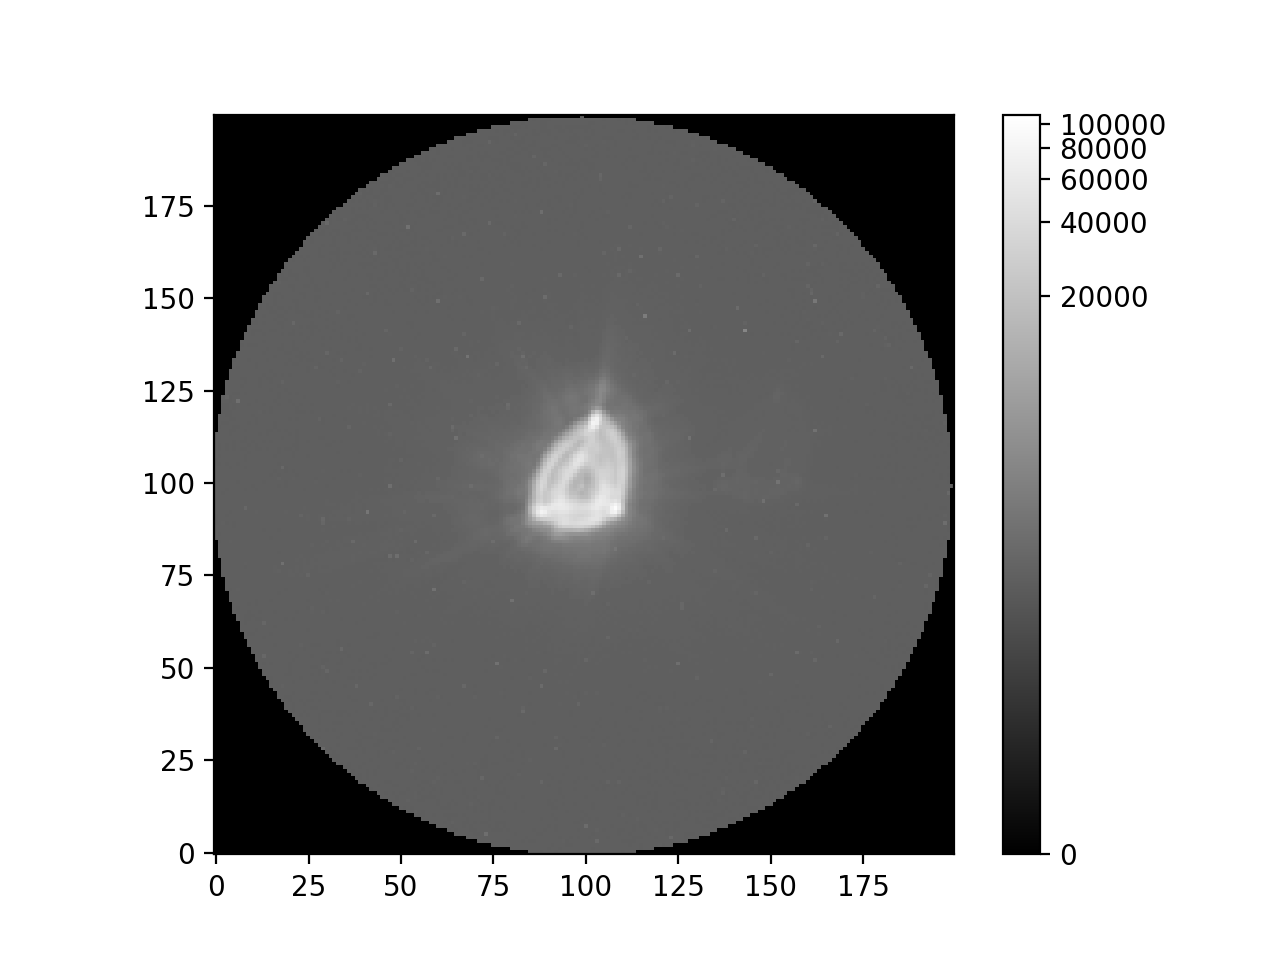

In [9]:
from astropy.visualization import simple_norm

idx = 100

norm = simple_norm(im_TS, 'log')

im = pl.imshow(im_TS[idx], origin='lower', norm=norm, cmap=pl.get_cmap("gray"))
pl.colorbar(im);

In [10]:
Subarray=hdul[1].data
Overscanleft = hdul["SCI_RAW_OverscanLeft"].data

In [11]:
J=[]
for i in range(0,1235):
    for j in range(0,200):
        for k in range(0,4):
            J.append(Overscanleft[i,j,k])

<IPython.core.display.Javascript object>


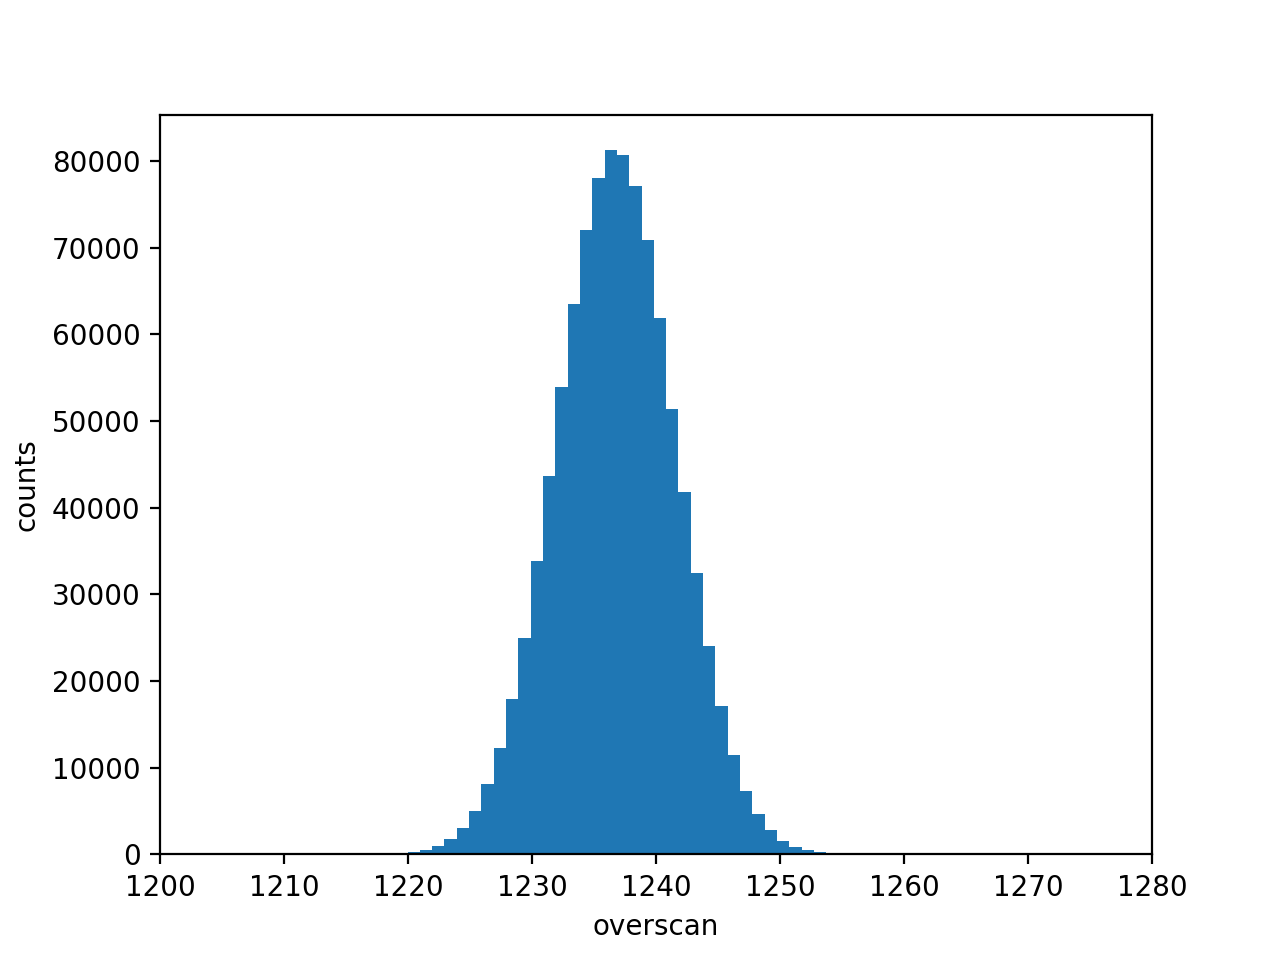

Text(0.5, 0, 'overscan')

In [12]:
pl.hist(J,bins=300)
pl.xlim(1200,1280)
pl.ylabel('counts')
pl.xlabel('overscan')

In [13]:
media=np.mean(J)
media

1236.417

In [14]:
Unbias=Subarray-media

<IPython.core.display.Javascript object>


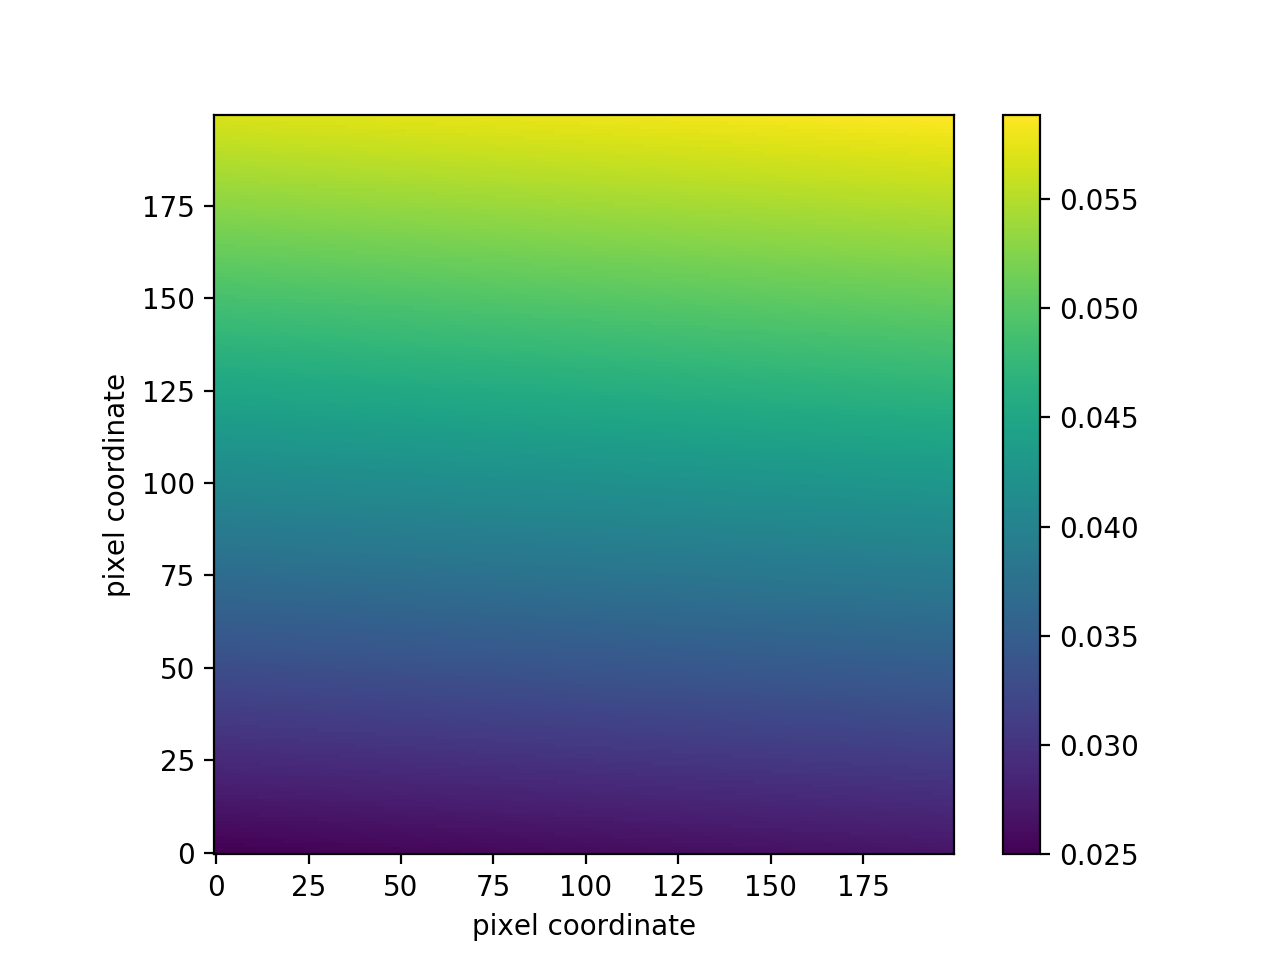

Text(0, 0.5, 'pixel coordinate')

In [15]:
#CCD Read-out time (s)
ROT=1/100000
#Frame Transfer Time (s)
FTT=0.025
#Row Read Time
RRT=ROT*16

Time=np.zeros([200,200])


for x in range(0,200):
    for y in range(0,200):
        Time[x,y]=((FTT+x*RRT+y*ROT))

im=pl.imshow(Time,origin='lower')
pl.colorbar(im)
pl.xlabel('pixel coordinate')
pl.ylabel('pixel coordinate')
   
        
        
        


In [16]:
Darkleft = hdul["SCI_RAW_DarkLeft"].data-media
Darkright=  hdul["SCI_RAW_DarkRight"].data-media

H=[]
for i in range(0,1535):
    H.append(np.mean(Darkleft[i].flatten()))
for j in range(0,1535):
    H.append(np.mean(Darkright[i].flatten()))
    
#print(H)
    
M=np.mean(H) #media de todas as exposicoes para os dark left/right pixels

#Average read time
ARD=M/0.025 #########VER SE E ESTE NUMERO QUE E PARA COLOCAR
Undark=ARD*Time

In [17]:
Final=Unbias-Undark

<IPython.core.display.Javascript object>


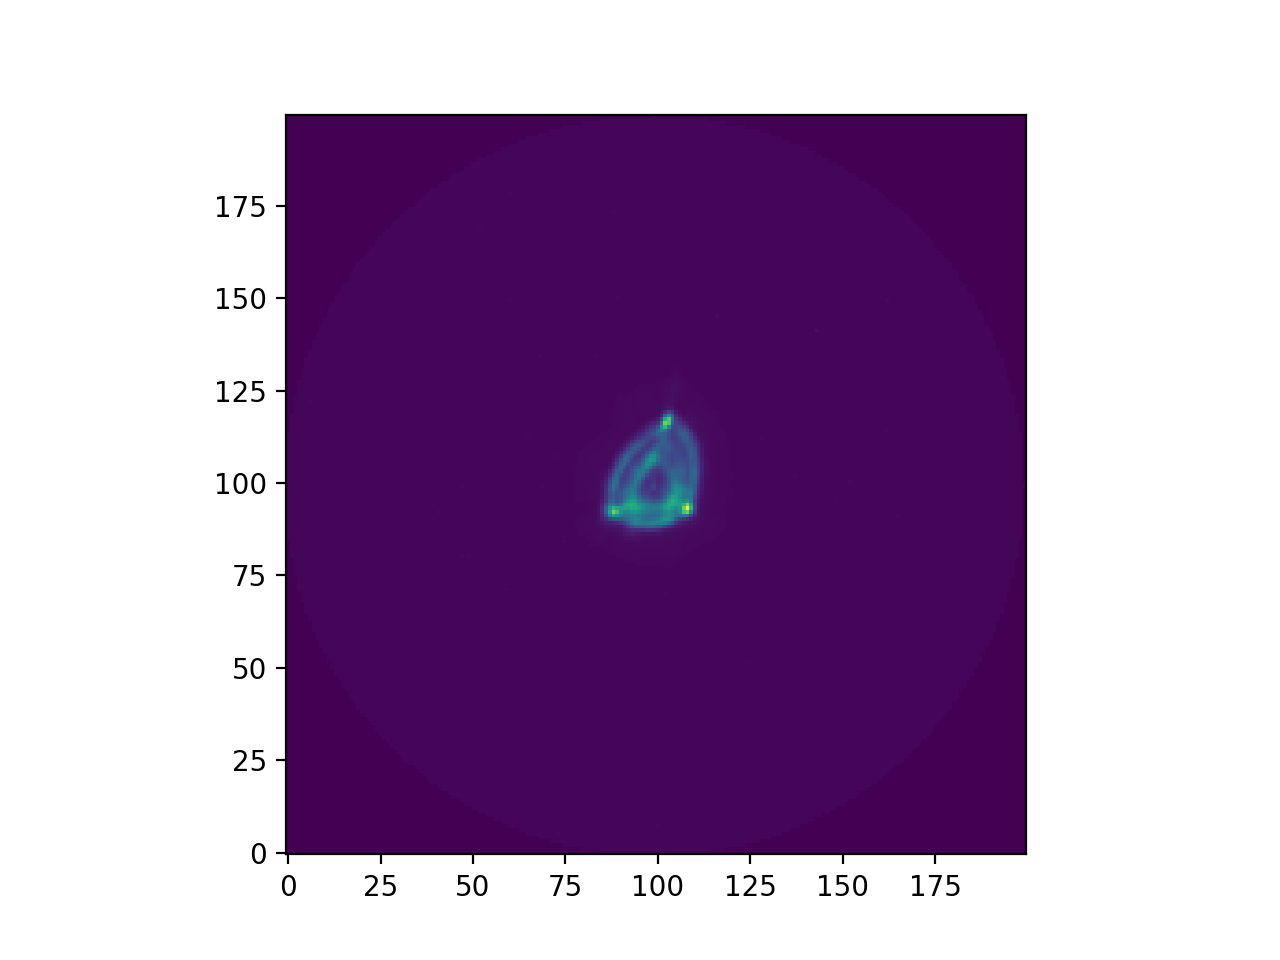

In [18]:
pl.imshow(Final[100],origin='lower')

<IPython.core.display.Javascript object>


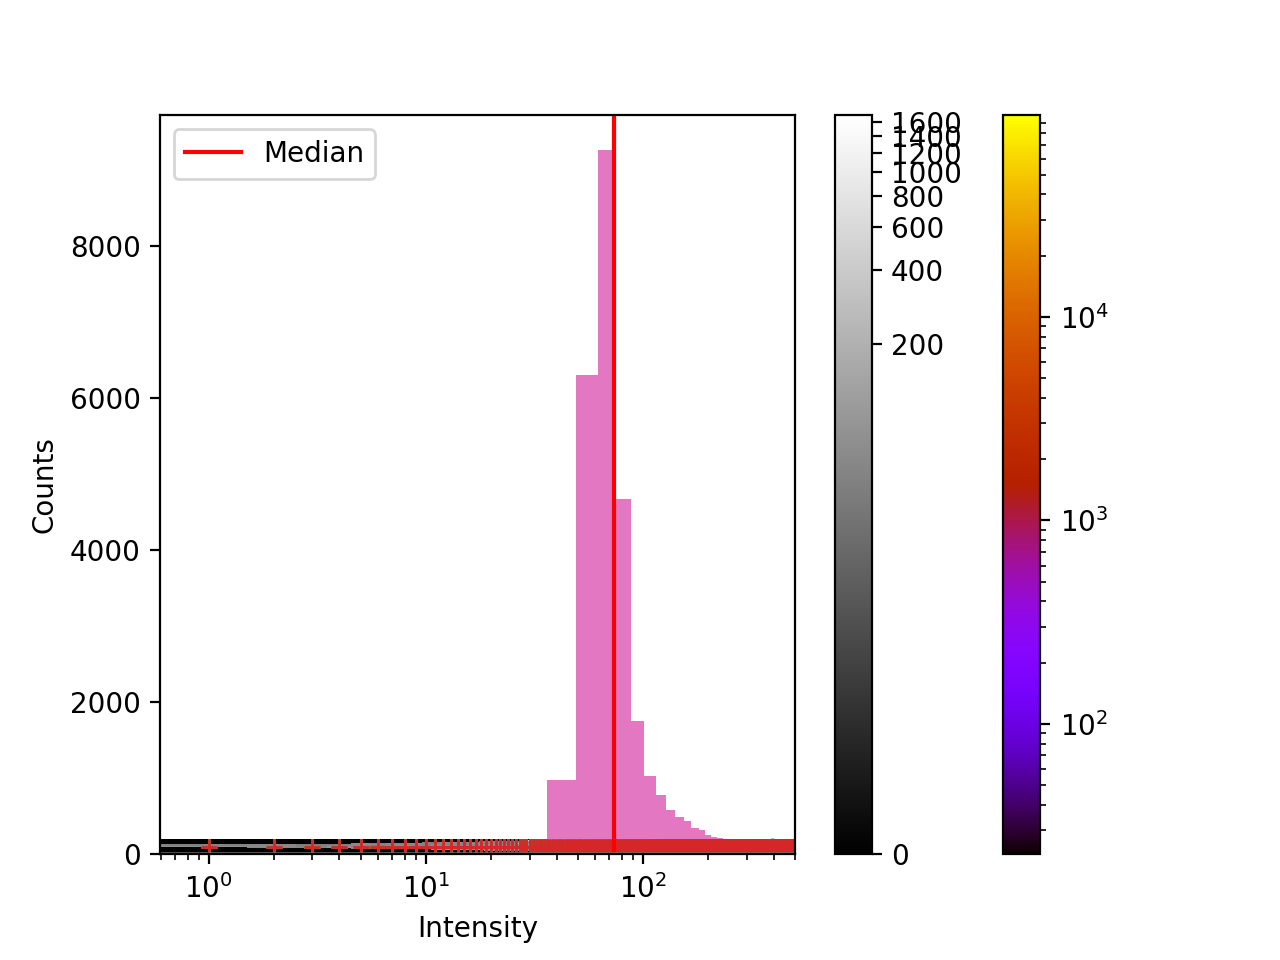

In [20]:
import matplotlib.colors as colors
fig, ax = pl.subplots()

im = ax.imshow(Final[100], origin="lower", cmap=pl.get_cmap("gnuplot"),
          norm=colors.LogNorm(),)
pl.colorbar(im);

In [21]:
from astropy.visualization import ZScaleInterval

zscale = ZScaleInterval()
zlims = zscale.get_limits(hdul[1].data)
norm = simple_norm(Final[100], 'log', min_cut=zlims[0], max_cut=zlims[1])

im = pl.imshow(Final[100], origin='lower', norm=norm, cmap=pl.get_cmap("gray"))
pl.colorbar(im);

<IPython.core.display.Javascript object>


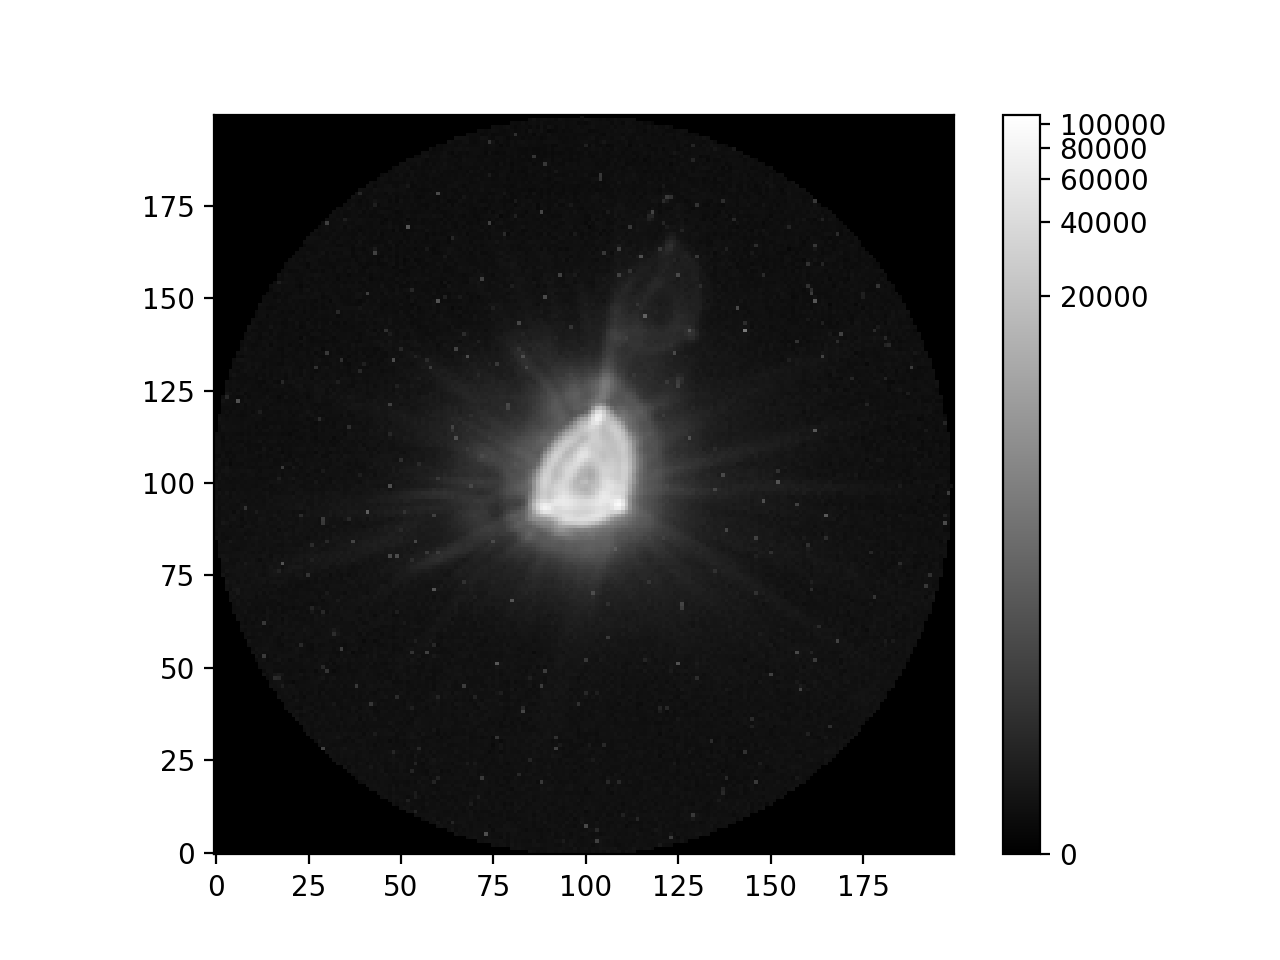

In [22]:
from astropy.visualization import simple_norm

norm = simple_norm(hdul[1].data,'log')

fig,ax=pl.subplots()
im = pl.imshow(Final[1000], origin='lower', norm=norm,cmap=pl.get_cmap("gray"))
pl.colorbar(im);

In [23]:
#Centroid
from scipy import ndimage

A=[]
for i in range(0,1535):
    A.append(ndimage.measurements.center_of_mass(hdul[1].data[i]))
    

pl.plot(A,'+')    
pl.xlabel('Time index')
pl.ylabel('pixel coordinate')

Text(76.31944444444443, 0.5, 'pixel coordinate')

In [24]:
#for i in range(0,1535):
#    CMx=np.mean(A[i][0])
#    CMy=np.mean(A[i][1])

#print(CMx)
#print(CMy)
#A.pop(392)
#print(A[1025])
#A.pop(1025)
#A.pop(1298)
#pl.plot(A)
#pl.plot(A)
index=[392,1026,1299]

B=np.delete(A,index,axis=0)

for i in range(0,1532):
    CMx=np.mean(B[i][0])
    CMy=np.mean(B[i][1])

print(CMx)
print(CMy)
    
pl.plot(B,'+')
pl.xlabel('Time index')
pl.ylabel('pixel coordinate')
#pl.hist(B,bins=150)

99.6079265865775
99.10143281263186


Text(76.31944444444443, 0.5, 'pixel coordinate')

<IPython.core.display.Javascript object>


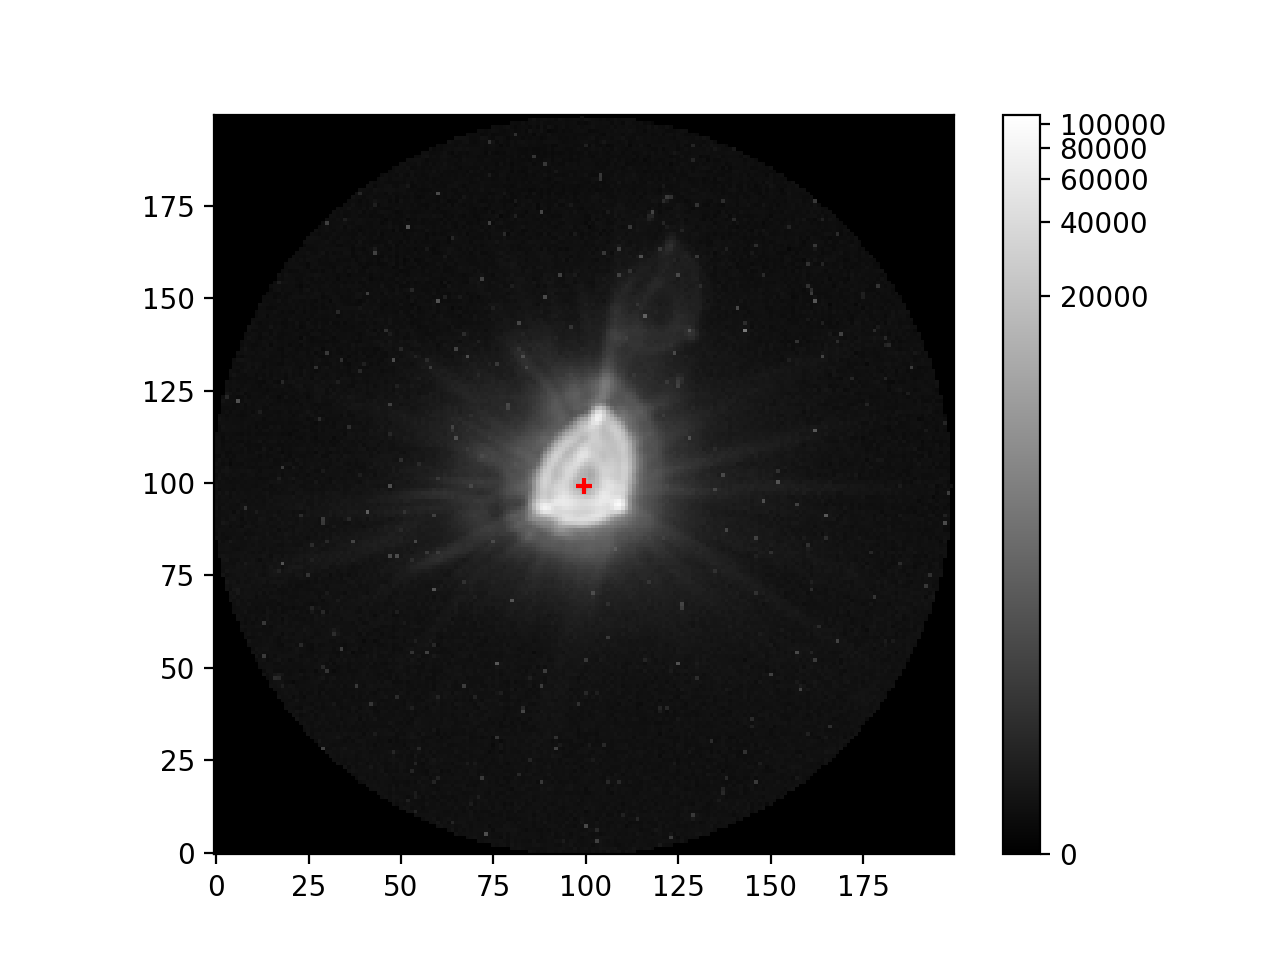

In [25]:
from astropy.visualization import simple_norm

norm = simple_norm(hdul[1].data,'log')

fig,ax=pl.subplots()

im = ax.imshow(Final[1000], origin='lower', norm=norm,cmap=pl.get_cmap("gray"))
ax.scatter(CMx,CMy,color='red',marker='+')
pl.colorbar(im);

In [ ]:
#Background

Final


<IPython.core.display.Javascript object>


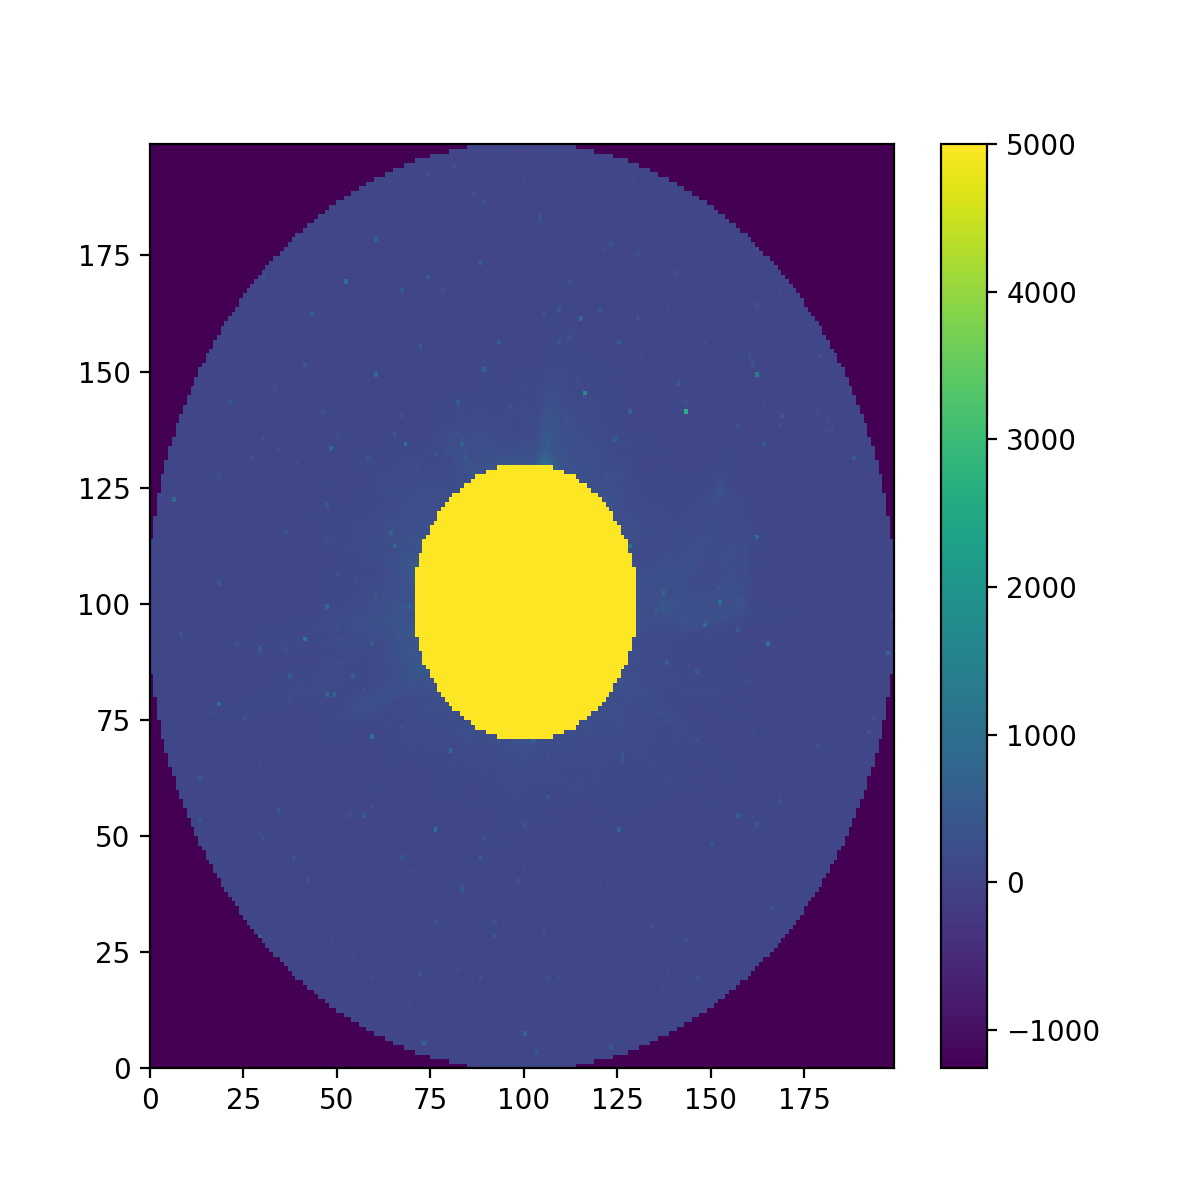

In [56]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 200)
y = np.arange(0, 200)
arr = Final[100]

cx = 100.
cy = 100.
r = 30

# The two lines below could be merged, but I stored the mask
# for code clarity.
mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
arr[mask] = 5000

# This plot shows that only within the circle the value is set to 123.
plt.figure(figsize=(6, 6))
plt.pcolormesh(x, y, arr)
plt.colorbar()
plt.show()

In [26]:
c=Final[100]

In [27]:
n=[]
for i in range(0,200):
    n.append((([x for x in c[i] if x!=5000])))

In [28]:
v=[]
for i in range(0,200):
    v.append((([x for x in n[i] if x<2000])))

In [29]:
vv=[]
for i in range(0,200):
    vv.append((([x for x in v[i] if x>0])))
    
vv=np.array(vv)

In [30]:
regular_list = vv
flat_list = [item for sublist in regular_list for item in sublist]
#print('Original list', regular_list)
#print('Transformed list', flat_list)

In [33]:
pl.hist(flat_list,bins=150)
pl.xscale('log')
pl.axvline(x=OK,color='red',label='Median')
pl.xlabel('Intensity')
pl.ylabel('Counts')
pl.legend()


In [34]:
OK=np.median(flat_list)
print(OK)

73.13180150794983


In [35]:
from scipy.stats import norm
mu, sigma = norm.fit(flat_list)
best_fit_line = norm.pdf(flat_list, mu, sigma)
#plt.plot(bins, best_fit_line)

pl.hist(flat_list,bins=150)
pl.plot(best_fit_line)
#pl.xscale('log')
pl.xlim(0,500)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


(0.5966919105404922, 500)

In [36]:
Finali=Final-OK

<IPython.core.display.Javascript object>


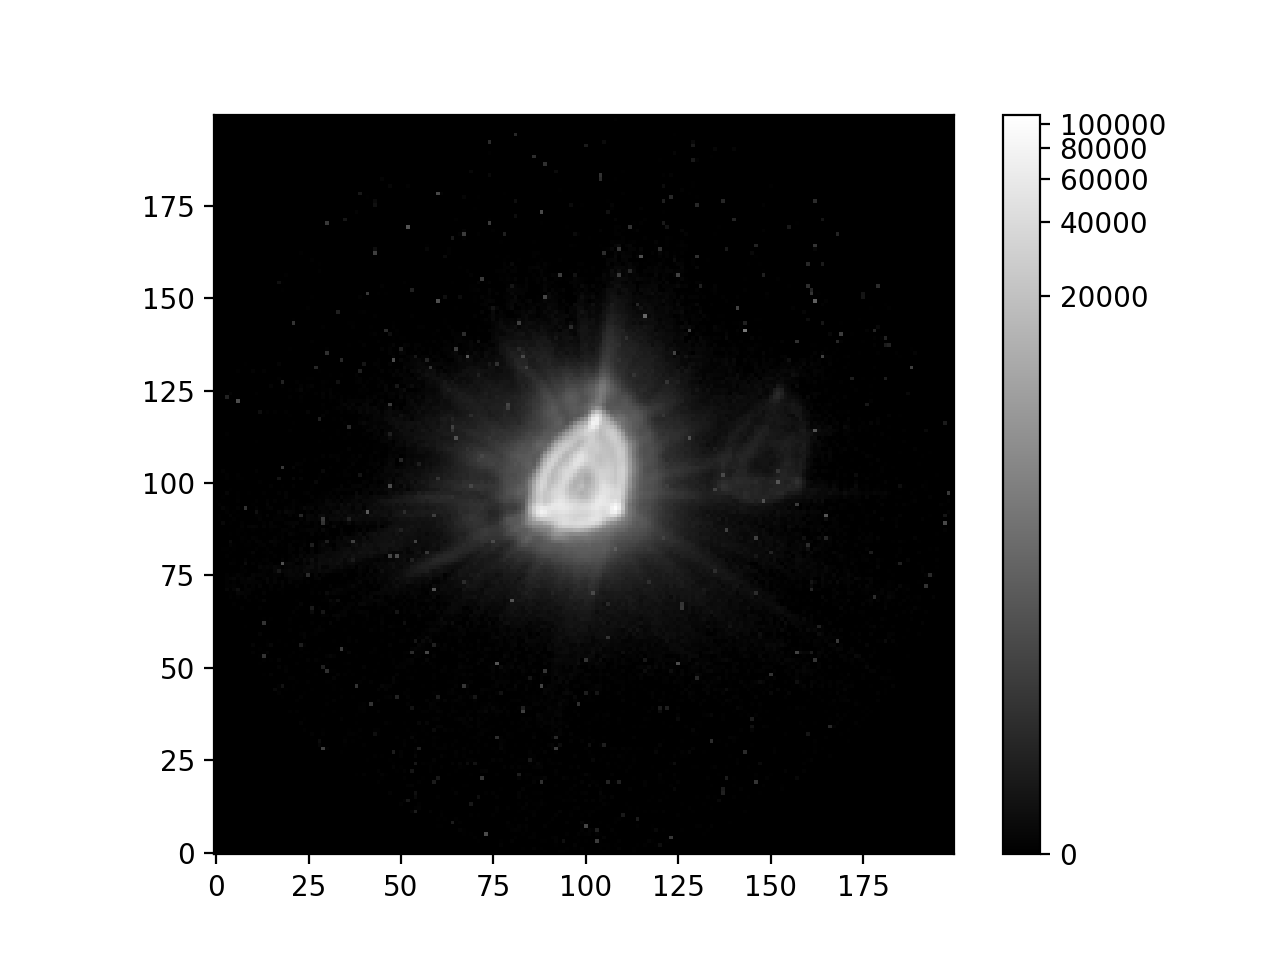

In [37]:
from astropy.visualization import simple_norm

norm = simple_norm(hdul[1].data,'log')

fig,ax=pl.subplots()
im = pl.imshow(Finali[100], origin='lower', norm=norm,cmap=pl.get_cmap("gray"))
pl.colorbar(im)

In [50]:
#Photometry

from matplotlib.colors import Normalize

X,Y=np.meshgrid(np.arange(Finali.shape[2]),np.arange(Finali.shape[1]))

half_size=25
aperture=np.logical_and(np.abs(X-100)<half_size,np.abs(Y-100)<half_size)

idx=100

norm=simple_norm(hdul[1].data,'log')

fig,ax=pl.subplots()
im=ax.imshow(Finali[idx],origin='lower',norm=norm,cmap=pl.get_cmap('gray'))
im=ax.imshow(aperture,alpha=0.2,origin='lower',cmap=pl.get_cmap('gray'))


ValueError: I/O operation on closed file

In [51]:
aperture_all=np.repeat(aperture[np.newaxis,...],Finali.shape[0],axis=0)

flux=np.sum(np.multiply(aperture_all,Finali),axis=(1,2))

In [52]:
with astropy.io.fits.open(path2files['SubArray']) as hdul:
    time=hdul['SCI_RAW_ImageMetadata'].data['MJD_TIME']

<IPython.core.display.Javascript object>


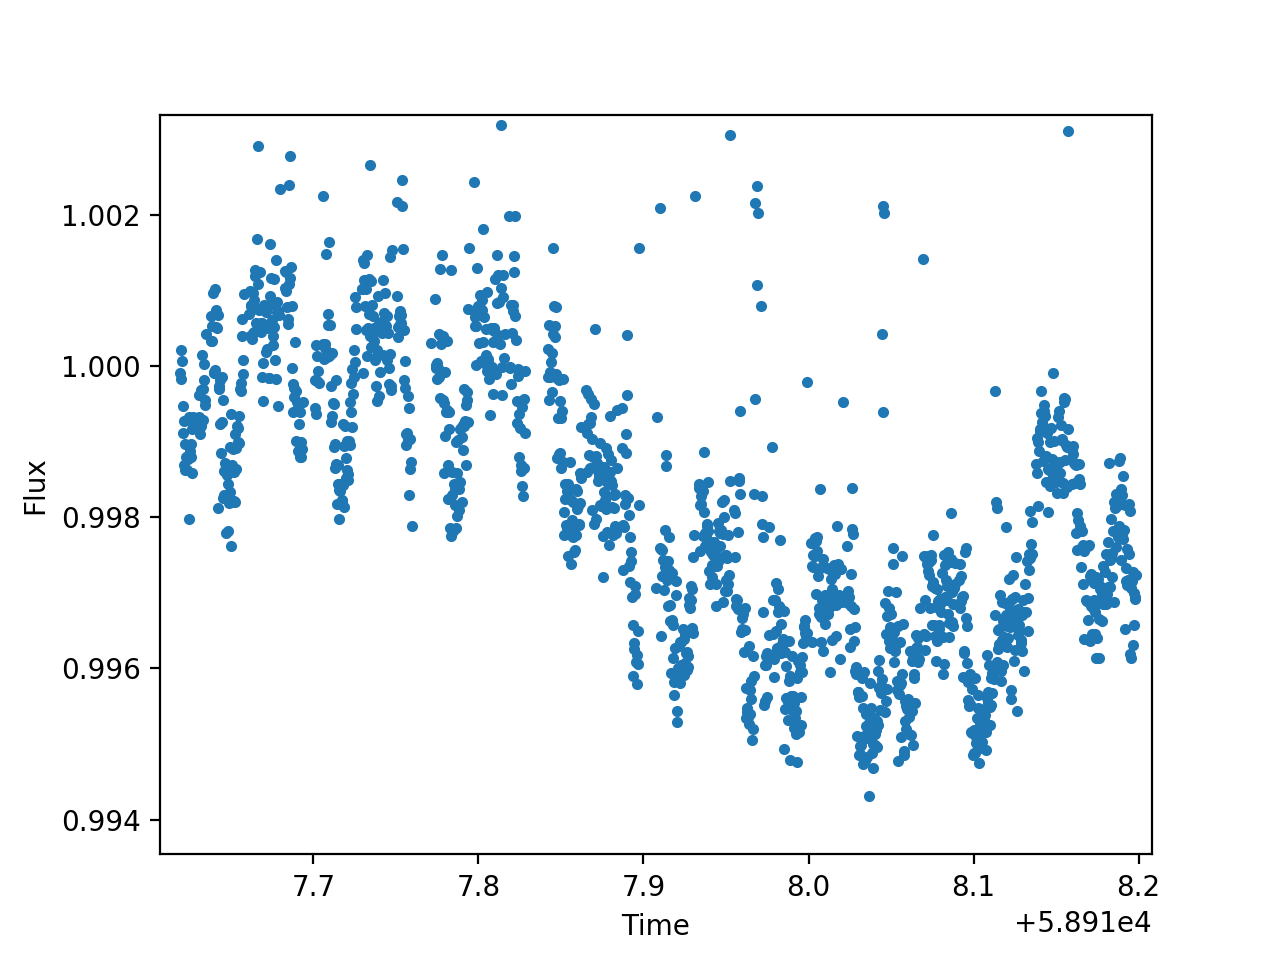

Text(0, 0.5, 'Flux')

In [53]:
fig,ax=pl.subplots()
ax.plot(time,flux/np.median(flux[:300]),'.')
pl.xlabel('Time')
pl.ylabel('Flux')
